we can just be careful to orthonomalize your basis, your singular basis has to be orthonormalize, you can use it to generate it, that can be the product of the basis. That is for the first part of the experiment. It would be interesting to apply those experiments, to some matrices, representatives of some problems, mechanical or chemical ones. If you know the, 
You can go there to find some use case. If you go to suite sparese Matrix collection. 
You can download , 2D,3D problem. which is AG  Monien airfolien problem

You can download it as matrix market format. 

import scipy as sp
A = sp.io.mmread('airfoil1.mtx')
when you do your numerical or experimentation,

we are doing it from Frobenius norm and Spectrum norm, and what would be interesting to compare it with truncated SVD, deterministic one
to be used as reference for, experiment. 
The storage part, also interesting, storage requirement. Different experiment you do. You have to be careful, when you do time experiment. 
Start with this part, 
1 and 2 of exercise. 
Preliminary Implement truncated SVD algo, to get reference approximation for given k target rank
Implement basic RSVD

You have error , theoretical 

it will be like a log graph

A - A approx vs k , RSVD, SVD , study it and compare it with P = 0, P=10, to play with different parameters


In [8]:
import numpy as np
import scipy.linalg as la

# Truncated SVD function
def truncated_svd(A, k):
    U, S, Vt = la.svd(A, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    return U_k, S_k, Vt_k

In [9]:
# Basic RSVD algorithm
def rsvd(A, k, p):
    m, n = A.shape
    Omega = np.random.randn(n, k + p)
    Y = A @ Omega
    
    # Power iteration
    for _ in range(q):
        Y = A @ (A.T @ Y)
    
    Q, _ = la.qr(Y, mode='economic')
    B = Q.T @ A
    U_hat, S, Vt = la.svd(B, full_matrices=False)
    U = Q @ U_hat
    return U[:, :k], np.diag(S[:k]), Vt[:k, :]

In [10]:
if __name__ == "__main__":
    # Synthesize a matrix with specific singular values distribution
    rng = np.random.default_rng()
    m, n = 200, 200
    r = min(m, n)
    eigenvals = np.logspace(0, -2, r)
    D = np.zeros((r, r))
    np.fill_diagonal(D, eigenvals)
    U, _ = la.qr(rng.standard_normal(size=(m, r)), mode='economic')
    V, _ = la.qr(rng.standard_normal(size=(n, r)), mode='economic')
    A = U @ D @ V.T

    # Truncated SVD
    k = 10
    U_k, S_k, Vt_k = truncated_svd(A, k)
    print("Truncated SVD results:")
    print("U_k shape:", U_k.shape)
    print("S_k shape:", S_k.shape)
    print("Vt_k shape:", Vt_k.shape)

    # Basic RSVD
    p = 5
    U_rsvd, S_rsvd, Vt_rsvd = rsvd(A, k, p)
    print("RSVD results:")
    print("U_rsvd shape:", U_rsvd.shape)
    print("S_rsvd shape:", S_rsvd.shape)
    print("Vt_rsvd shape:", Vt_rsvd.shape)

Truncated SVD results:
U_k shape: (200, 10)
S_k shape: (10, 10)
Vt_k shape: (10, 200)
RSVD results:
U_rsvd shape: (200, 10)
S_rsvd shape: (10, 10)
Vt_rsvd shape: (10, 200)


In [11]:
# Variant 1: Single pass RSVD
def rsvd_single_pass(A, k, p):
    m, n = A.shape
    Omega = np.random.randn(n, k + p)
    Y = A @ Omega
    Q, _ = la.qr(Y, mode='economic')
    B = Q.T @ A
    U_hat, S, Vt = la.svd(B, full_matrices=False)
    U = Q @ U_hat
    return U[:, :k], np.diag(S[:k]), Vt[:k, :]



In [12]:
# Variant 2: Multiple passes RSVD
def rsvd_multiple_passes(A, k, p, num_passes=2):
    m, n = A.shape
    Omega = np.random.randn(n, k + p)
    Y = A @ Omega
    
    for _ in range(num_passes):
        Y = A @ (A.T @ Y)
    
    Q, _ = la.qr(Y, mode='economic')
    B = Q.T @ A
    U_hat, S, Vt = la.svd(B, full_matrices=False)
    U = Q @ U_hat
    return U[:, :k], np.diag(S[:k]), Vt[:k, :]

In [13]:
import numpy as np
import scipy.io
import scipy.linalg as la

# Function to load matrices from MatrixMarket format
def load_matrix(file_path):
    return scipy.io.mmread(file_path).toarray()

# Load the airfoil1 matrix
file_path = '/Users/shubhankar/Documents/GitSpace/RNLA/hpc-ia-rnla-main/airfoil1/airfoil1.mtx'
A = load_matrix(file_path)
print(f"Loaded matrix shape: {A.shape}")

Loaded matrix shape: (4253, 4253)


In [17]:

# Function to test RSVD implementations
def test_rsvd(A, k, p_values, q_values):
    U_k, S_k, Vt_k = truncated_svd(A, k)
    A_tsvd = U_k @ S_k @ Vt_k
    norm_tsvd = np.linalg.norm(A - A_tsvd, 'fro')
    print(f"Truncated SVD Frobenius norm difference: {norm_tsvd}")
    
    results = []
    
    for p in p_values:
        for q in q_values:
            U_rsvd, S_rsvd, Vt_rsvd = rsvd(A, k, p)
            A_rsvd = U_rsvd @ S_rsvd @ Vt_rsvd
            norm_rsvd = np.linalg.norm(A - A_rsvd, 'fro')
            print(f"RSVD (p={p}, q={q}) Frobenius norm difference: {norm_rsvd}")

            U_rsvd_single, S_rsvd_single, Vt_rsvd_single = rsvd_single_pass(A, k, p)
            A_rsvd_single = U_rsvd_single @ S_rsvd_single @ Vt_rsvd_single
            norm_rsvd_single = np.linalg.norm(A - A_rsvd_single, 'fro')
            print(f"Single pass RSVD (p={p}) Frobenius norm difference: {norm_rsvd_single}")

            U_rsvd_multi, S_rsvd_multi, Vt_rsvd_multi = rsvd_multiple_passes(A, k, p, q)
            A_rsvd_multi = U_rsvd_multi @ S_rsvd_multi @ Vt_rsvd_multi
            norm_rsvd_multi = np.linalg.norm(A - A_rsvd_multi, 'fro')
            print(f"Multiple passes RSVD (p={p}, q={q}) Frobenius norm difference: {norm_rsvd_multi}")

            results.append((p, q, norm_rsvd, norm_rsvd_single, norm_rsvd_multi))

    return results

if __name__ == "__main__":
    # Load the airfoil1 matrix
    file_path = '/Users/shubhankar/Documents/GitSpace/RNLA/hpc-ia-rnla-main/airfoil1/airfoil1.mtx'
    A = load_matrix(file_path)
    print(f"Loaded matrix shape: {A.shape}")

    # Parameters
    k = 10
    p_values = [5, 10, 20]
    q_values = [0, 1, 2]

    # Test the RSVD implementations on the airfoil1 matrix
    results = test_rsvd(A, k, p_values, q_values)

Loaded matrix shape: (4253, 4253)
Truncated SVD Frobenius norm difference: 155.63216840560804
RSVD (p=5, q=0) Frobenius norm difference: 156.2973029118537
Single pass RSVD (p=5) Frobenius norm difference: 156.29236630465294
Multiple passes RSVD (p=5, q=0) Frobenius norm difference: 156.291669847226
RSVD (p=5, q=1) Frobenius norm difference: 156.28842999562414
Single pass RSVD (p=5) Frobenius norm difference: 156.28394538411507
Multiple passes RSVD (p=5, q=1) Frobenius norm difference: 155.90374629985166
RSVD (p=5, q=2) Frobenius norm difference: 156.28915778376066
Single pass RSVD (p=5) Frobenius norm difference: 156.28675206479568
Multiple passes RSVD (p=5, q=2) Frobenius norm difference: 155.80606777989962
RSVD (p=10, q=0) Frobenius norm difference: 156.2736591233895
Single pass RSVD (p=10) Frobenius norm difference: 156.27516504751583
Multiple passes RSVD (p=10, q=0) Frobenius norm difference: 156.2724098970331
RSVD (p=10, q=1) Frobenius norm difference: 156.27361986192867
Single pa

In [18]:

# Function to plot results
def plot_results(results):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for p, q, norm_rsvd, norm_rsvd_single, norm_rsvd_multi in results:
        ax[0].scatter(p, norm_rsvd, label=f'q={q}')
        ax[1].scatter(p, norm_rsvd_single, label=f'q={q}')
        ax[2].scatter(p, norm_rsvd_multi, label=f'q={q}')

    ax[0].set_title('RSVD with Power Iteration')
    ax[0].set_xlabel('p')
    ax[0].set_ylabel('Frobenius Norm Difference')
    ax[0].legend()

    ax[1].set_title('Single Pass RSVD')
    ax[1].set_xlabel('p')
    ax[1].set_ylabel('Frobenius Norm Difference')
    ax[1].legend()

    ax[2].set_title('Multiple Passes RSVD')
    ax[2].set_xlabel('p')
    ax[2].set_ylabel('Frobenius Norm Difference')
    ax[2].legend()

    plt.show()


In [ ]:

if __name__ == "__main__":
    # Load the airfoil1 matrix
    file_path = 'airfoil1.mtx'
    A = load_matrix(file_path)
    print(f"Loaded matrix shape: {A.shape}")

    # Parameters
    k = 10
    p_values = [5, 10, 20]
    q_values = [0, 1, 2]

    # Test the RSVD implementations on the airfoil1 matrix
    results = test_rsvd(A, k, p_values, q_values)

    # Plot the results
    plot_results(results)

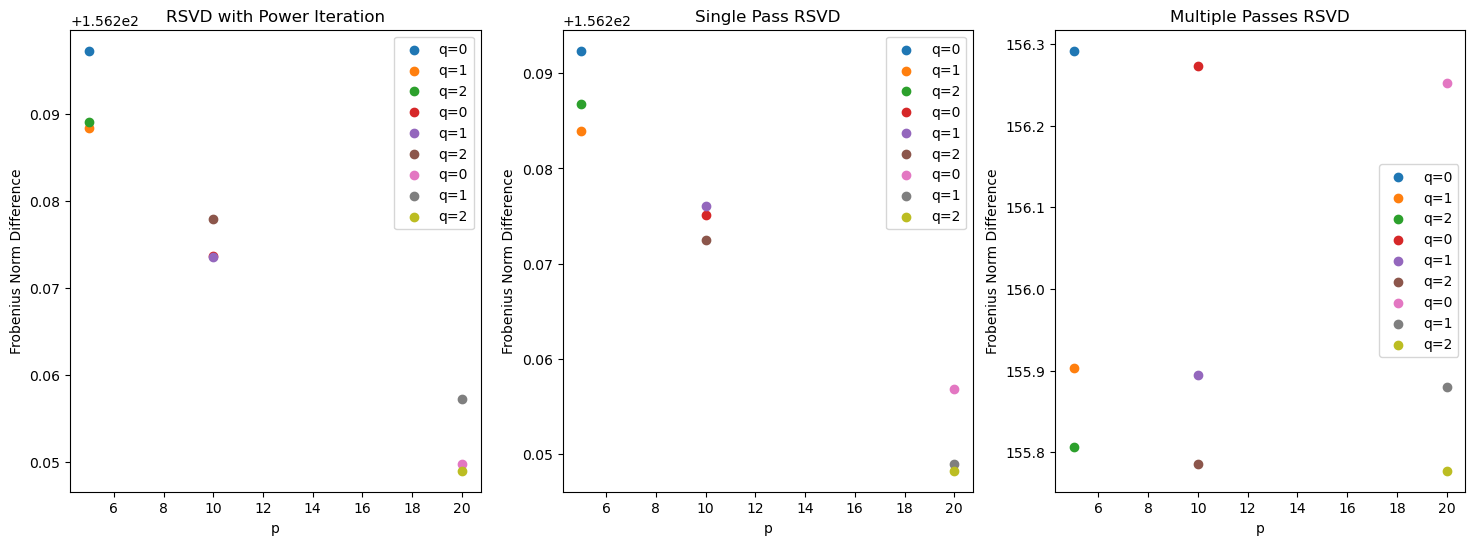

In [20]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    plot_results(results)

In [23]:

# Function to plot results
def plot_results2(results):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Group results by p and q for continuous lines
    for p in set(r[1] for r in results):
        for q in set(r[2] for r in results):
            k_vals = [r[0] for r in results if r[1] == p and r[2] == q]
            residuals_rsvd = [r[4] for r in results if r[1] == p and r[2] == q]
            residuals_rsvd_multi = [r[6] for r in results if r[1] == p and r[2] == q]
            ax[0].plot(k_vals, residuals_rsvd, label=f'p={p}, q={q}')
            ax[2].plot(k_vals, residuals_rsvd_multi, label=f'p={p}, q={q}')

    for p in set(r[1] for r in results):
        k_vals = [r[0] for r in results if r[1] == p]
        residuals_rsvd_single = [r[5] for r in results if r[1] == p]
        ax[1].plot(k_vals, residuals_rsvd_single, label=f'p={p}')

    ax[0].set_title('RSVD with Power Iteration')
    ax[0].set_xlabel('k')
    ax[0].set_ylabel('Residual (Frobenius Norm Difference)')
    ax[0].legend()

    ax[1].set_title('Single Pass RSVD')
    ax[1].set_xlabel('k')
    ax[1].set_ylabel('Residual (Frobenius Norm Difference)')
    ax[1].legend()

    ax[2].set_title('Multiple Passes RSVD')
    ax[2].set_xlabel('k')
    ax[2].set_ylabel('Residual (Frobenius Norm Difference)')
    ax[2].legend()

    plt.show()

IndexError: tuple index out of range

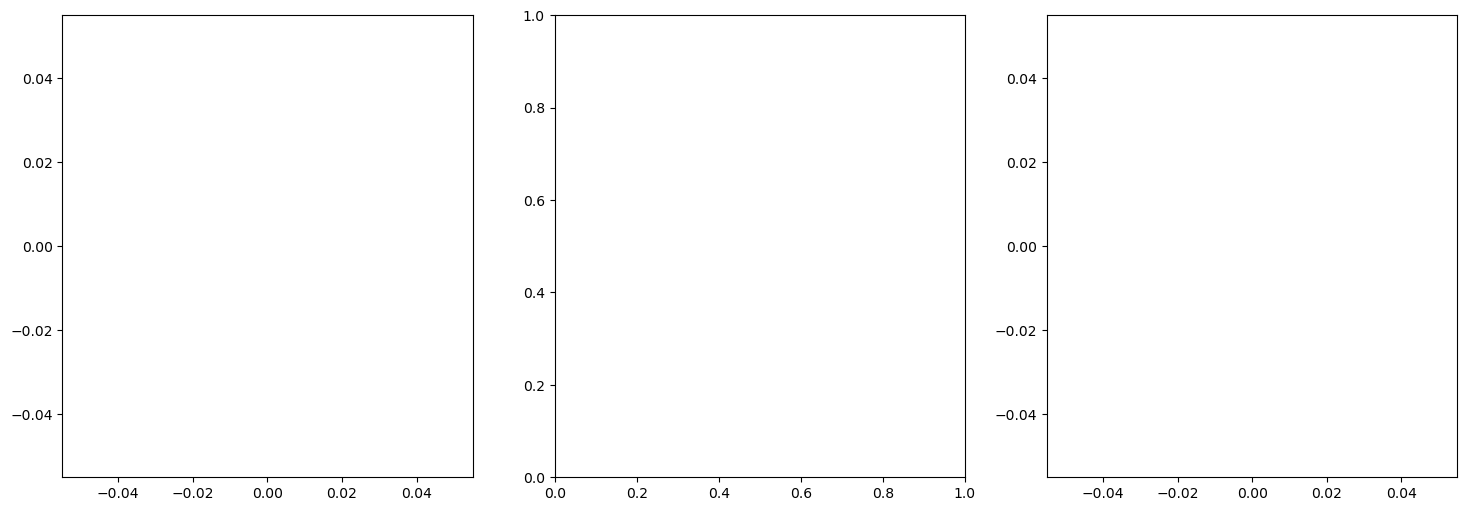

In [24]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    plot_results2(results)